# Introduction

Taufik Aji Putra <br>
PYTN-KS05-003 <br>
Introduction to Python for Data Science (Studi Independen Kampus Merdeka Batch II) <br>

# Project Overview

**Statistical Treatment for Retail Datasets**

Dataset NYC Property Sales From Kaggle. This dataset is a record of **every building** or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017. [Download Here](https://www.kaggle.com/new-york-city/nyc-property-sales) <br>

**Dataset Descriptions** <br>

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

# Import Library 

**Import library yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Preparation

**Import dataset yang akan digunakan, yakni datasetset nyc-rolling-sales.csv <br> [Download Here](https://www.kaggle.com/new-york-city/nyc-property-sales)**

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

**Mendapatkan 5 baris data awal dari dataset**

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Mendapatkan 5 baris data terakhir dari dataset**

In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


**Mengetahui adanya null values dan tipe data dari setiap kolom**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Mengetahui gambaran statistikal dari dataset**

In [6]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


**Mengetahui dimensi dari dataset**

In [7]:
df.shape

(84548, 22)

**Mengetahui kolom yang terdapat pada dataset**

In [8]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

**Melihat unique values dari setiap kolom untuk mengetahui apakah terdapat missing values yang berbeda (unstandard missing values)**

In [9]:
for col in df.columns:
    print("Unique Values for: ",col)
    print(df[col].nunique())
    print("="*20)
    print(df[col].unique())
    print("="*20)

Unique Values for:  Unnamed: 0
26736
[    4     5     6 ... 26737 26738 26739]
Unique Values for:  BOROUGH
5
[1 2 3 4 5]
Unique Values for:  NEIGHBORHOOD
254
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'CO

Pada beberapa kolom masih terdapat *unstandard missing values* yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values: <br>
1. Kolom "Unnamed: 0" sebagai iterator dan tidak diperlukan untuk analisis berikutnya, sehingga akan didrop
2. Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values
3. Kolom 'EASE-MENT' tidak mengandung informasi dan hanya memuat satu nilai (' ') yang diidentifikasi sebagai missing values, sehingga untuk selanjutnya akan dibuang
4. Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
5. Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values
6. Kolom 'SALE PRICE'  mengandung nilai (' -  ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi

# Data Preprocessing

## Tahap Awal

**Mendefinisikan unstandard missing values**

Dilakukan read dataset kembali dengan mendefinisikan unstardard missing values

In [10]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values)

**Melihat nilai statistikal pada setiap kolom**

In [11]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,0.0,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,10344.359878,2.998758,4237.218976,376.224015,NaN,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,NaN,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,4.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,NaN,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,NaN,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


**Mengecek missing value**

In [12]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

---
**Melihat value=0 pada kolom tertentu untuk dilakukan replacing**

In [13]:
print("YEAR BUILT '0' Count: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("ZIP CODE '0' Count: ",df[df['ZIP CODE']==0]['ZIP CODE'].count())
print("TOTAL UNITS '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())

YEAR BUILT '0' Count:  6970
ZIP CODE '0' Count:  982
TOTAL UNITS '0' Count:  19762



**Melakukan replacing pada kolom yang mengandung nilai 0**

In [14]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df['YEAR BUILT']=df['YEAR BUILT'].replace({0:np.nan})
df['ZIP CODE']=df['ZIP CODE'].replace({0:np.nan})
df['TOTAL UNITS']=df['TOTAL UNITS'].replace({0:np.nan})

**Memastikan bahwa sudah dilakukan replacing dengan benar**

In [15]:
print("YEAR BUILT '0' Count: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("TOTAL UNITS '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())

YEAR BUILT '0' Count:  0
TOTAL UNIT '0' Count:  0
TOTAL UNITS '0' Count:  0


**Melihat missing value setelah replacing**

In [16]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

**Melihat dataframe**

In [17]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


**Menghapus kolom-kolom yang tidak dibutuhkan**

In [18]:
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df.drop(unnecessary_columns,inplace=True, axis=1)

In [19]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


## Handling Missing Values

**Mengecek missing values pada dataset**

In [20]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

**Mengecek nilai Skewness (Data Numerik)**

In [21]:
df.skew(axis=0, skipna=True, numeric_only=True)

BOROUGH                       -0.325005
BLOCK                          1.049335
LOT                            3.500679
ZIP CODE                      -0.463641
RESIDENTIAL UNITS             60.702733
COMMERCIAL UNITS             214.401123
TOTAL UNITS                   55.804937
LAND SQUARE FEET              73.341981
GROSS SQUARE FEET             59.636819
YEAR BUILT                     0.217605
TAX CLASS AT TIME OF SALE      1.515380
SALE PRICE                   124.094251
dtype: float64

**Melakukan perubahan pada data missing value**

Untuk tipe data Kategorik : dimasukkan nilai **modus**

In [22]:
# Data Kategorik

categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)

Untuk tipe data Numerik: 
- skew < +-2 , dimasukkan dengan nilai **mean**
- skew > +-2 , dimasukkan dengan nilai **median**

Disini tidak mengikutsertakan SALE PRICE karena pencilan SALE PRICE tidak terlalu berpengaruh untuk analisis selanjutnya

In [23]:
# Data Numerik
float_columns = ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df[float_col].fillna(df[float_col].median(),inplace=True)

**Menghapus sisa kolom yang masih memuat missing values**

In [24]:
df.dropna(inplace=True)

**Melihat info data setelah melakukan penghapusan missing values**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         69987 non-null  int64  
 1   NEIGHBORHOOD                    69987 non-null  object 
 2   BUILDING CLASS CATEGORY         69987 non-null  object 
 3   TAX CLASS AT PRESENT            69987 non-null  object 
 4   BLOCK                           69987 non-null  int64  
 5   LOT                             69987 non-null  int64  
 6   BUILDING CLASS AT PRESENT       69987 non-null  object 
 7   ZIP CODE                        69987 non-null  float64
 8   RESIDENTIAL UNITS               69987 non-null  int64  
 9   COMMERCIAL UNITS                69987 non-null  int64  
 10  TOTAL UNITS                     69987 non-null  float64
 11  LAND SQUARE FEET                69987 non-null  float64
 12  GROSS SQUARE FEET               

**Mengecek kembali nilai missing values**

In [26]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## Handling Duplicated

**Menghitung total nilai duplicated**

In [27]:
df.duplicated().sum()

469

**Melihat baris duplicated data**

In [28]:
df[df.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
393,1,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,770,59,D4,10011.0,0,0,1.0,2325.0,1680.0,1913.0,2,D4,207564.0,2016-09-27 00:00:00
471,1,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,797,76,D4,10011.0,0,0,1.0,2325.0,1680.0,1950.0,2,D4,839000.0,2017-06-29 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


**Melakukan penghapusan duplicated data**

In [29]:
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)

**Melihat shape data setelah menghapus duplicated data**

In [30]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309.0,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


**Melihat shape data**

In [31]:
df.shape

(69518, 18)

**Melihat aspek statistikal data setiap kolom**

In [32]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,69518.000000,69518.000000,69518.000000,69518.000000,69518.000000,69518.000000,69518.000000,6.951800e+04,6.951800e+04,69518.000000,69518.00000,6.951800e+04
mean,2.923818,4201.131016,374.929299,10856.318407,1.854210,0.164087,2.290500,3.169698e+03,2.936054e+03,1947.272260,1.63959,1.281950e+06
std,1.236522,3432.304489,656.451677,549.781061,13.692346,9.002965,16.470139,3.316414e+04,2.407227e+04,34.251297,0.76787,1.143759e+07
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1111.000000,1.00000,0.000000e+00
25%,2.000000,1350.000000,22.000000,10309.000000,0.000000,0.000000,1.000000,1.900000e+03,1.266250e+03,1920.000000,1.00000,2.300000e+05
50%,3.000000,3379.500000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1938.000000,2.00000,5.345810e+05
75%,4.000000,6192.000000,879.000000,11249.000000,2.000000,0.000000,2.000000,2.500000e+03,2.056750e+03,1965.000000,2.00000,9.500000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.00000,2.210000e+09


## Mengubah Tipe Data

**Mengubah tipe data menjadi yang seharusnya**

In [33]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# Mengubah tipe data menjadi tipe 'str'
for col in categoricals_columns:
    df[col] = df[col].astype('str')

# Mengubah tipe data menjadi tipe 'float'
for col in float_columns:
    df[col] = df[col].astype('float64')

# Mengubah tipe data menjadi 'int'
for col in integer_columns:
    df[col] = df[col].astype('int64')

**Mengganti nilai pada kolom 'BOROUGH' dengan nilai yang seharusnya dan menjadi tipe string**

In [34]:
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

**Memodifikasi kolom 'SALE DATE' dengan mengubah tipe data dan membuat kolom baru (Year,Month,Day)**

In [35]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE DATE dt'] = df['SALE DATE'].dt.day
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

**Mendapatkan info tipe data setelah diubah**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69518 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         69518 non-null  object 
 1   NEIGHBORHOOD                    69518 non-null  object 
 2   BUILDING CLASS CATEGORY         69518 non-null  object 
 3   TAX CLASS AT PRESENT            69518 non-null  object 
 4   BLOCK                           69518 non-null  int64  
 5   LOT                             69518 non-null  int64  
 6   BUILDING CLASS AT PRESENT       69518 non-null  object 
 7   ZIP CODE                        69518 non-null  object 
 8   RESIDENTIAL UNITS               69518 non-null  int64  
 9   COMMERCIAL UNITS                69518 non-null  int64  
 10  TOTAL UNITS                     69518 non-null  float64
 11  LAND SQUARE FEET                69518 non-null  float64
 12  GROSS SQUARE FEET               

**Melakukan reindexing setelah preprocessing awal**

In [37]:
df = df.reset_index(drop=True)

**Melihat dataframe setelah reindexing**

In [38]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69513,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
69514,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday
69515,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,...,4000.0,1496.0,1925.0,1,B2,460000.0,2017,July,5,Wednesday
69516,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309.0,0,7,...,208033.0,64117.0,2001.0,4,K6,11693337.0,2016,December,21,Wednesday


## Filtering Outliers

**Mengatur options untuk menghindari error saat filtering keseluruhan**

In [39]:
pd.options.mode.chained_assignment = None

**Melihat boxplot 'SALE PRICE' untuk melihat outlier**

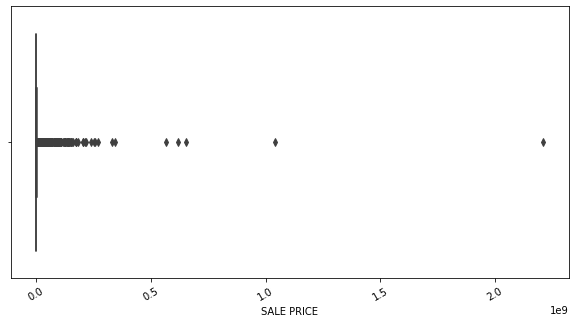

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

**Melakukan filtering secara keseluruhan (Mengambil rentang yang bukan outlier)**

In [41]:
# Hitung kuartile 3 setiap atribut pada data
Q3 = df.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df[
    ~((df < (Q1 - steps* IQR)) |(df > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered = df_filtered.reset_index(drop=True)
df = df_filtered

**Melihat boxplot 'SALE PRICE' untuk melihat outlier**

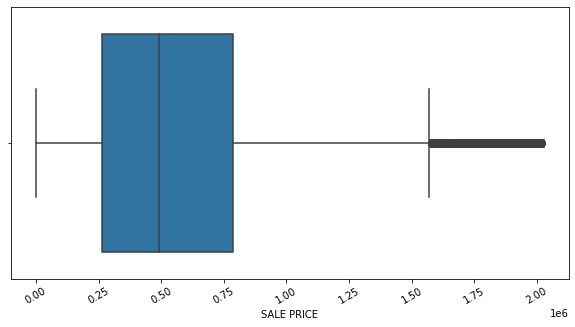

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

Karena masih terdapat outlier maka akan dilakukan filtering secara spesifik pada SALE PRICE

**Melakukan filtering berdasarkan 'SALE PRICE'**

In [43]:
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 850000)]

**Melihat boxplot 'SALE PRICE' setelah filtering 'SALE PRICE'**

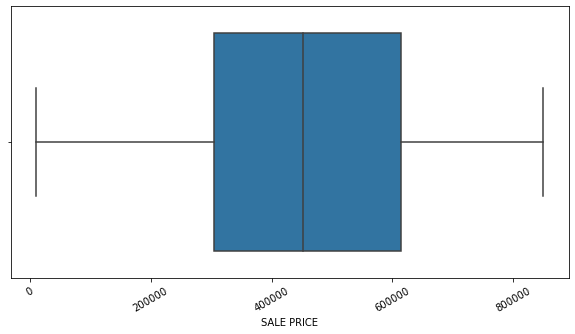

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

**Melihat dataframe setelah dilakukan filtering**

In [45]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
1,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,499000.0,2017,March,10,Friday
3,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,529500.0,2017,June,9,Friday
4,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,423000.0,2017,July,14,Friday
5,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,C6,10009.0,0,0,...,2325.0,1680.0,1925.0,2,C6,501000.0,2017,March,16,Thursday
6,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,450000.0,2016,September,1,Thursday


---
**Melihat dimensi data setelah dilakukan filtering**

In [46]:
df.shape

(24038, 21)

**Melihat kembali nilai statistik dari setiap kolom**

In [47]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
count,24038.000000,24038.000000,24038.000000,24038.0,24038.000000,24038.000000,24038.000000,24038.000000,24038.000000,24038.000000
mean,4522.172269,248.649846,0.882228,0.0,1.252184,2283.881521,1655.288876,458166.839047,2016.650720,16.596472
std,3394.498508,449.939701,0.818962,0.0,0.500998,360.017597,376.166893,197565.374227,0.476753,8.803882
min,1.000000,1.000000,0.000000,0.0,1.000000,1000.000000,150.000000,10001.000000,2016.000000,1.000000
25%,1527.000000,18.000000,0.000000,0.0,1.000000,2200.000000,1532.000000,304000.000000,2016.000000,9.000000
50%,3813.000000,42.000000,1.000000,0.0,1.000000,2325.000000,1680.000000,451230.000000,2017.000000,17.000000
75%,6810.000000,119.000000,1.000000,0.0,1.000000,2325.000000,1680.000000,615000.000000,2017.000000,24.000000
max,13407.000000,2162.000000,3.000000,0.0,3.000000,3400.000000,3240.000000,849999.000000,2017.000000,31.000000


## Tahap Akhir

**Memastikan kembali bahwa tidak ada missing values**

In [48]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

**Melihat dataframe data kembali**

In [49]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
1,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,499000.0,2017,March,10,Friday
3,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,529500.0,2017,June,9,Friday
4,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,423000.0,2017,July,14,Friday
5,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,C6,10009.0,0,0,...,2325.0,1680.0,1925.0,2,C6,501000.0,2017,March,16,Thursday
6,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,C6,10009.0,0,0,...,2325.0,1680.0,1920.0,2,C6,450000.0,2016,September,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36578,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7092,15,B9,10309.0,2,0,...,2337.0,1964.0,2010.0,1,B9,590000.0,2017,March,1,Wednesday
36579,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7092,113,B9,10309.0,2,0,...,2429.0,1798.0,2010.0,1,B9,580000.0,2017,April,26,Wednesday
36580,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309.0,2,0,...,3325.0,1300.0,1995.0,1,B2,509000.0,2016,October,31,Monday
36581,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday


# Measure of Central Tendency

---
## Mean

**Question** : Menghitung rata-rata dari 'SALE PRICE' untuk setiap 'BOROUGH'. Tentukan mana yang memiliki rata-rata terbesar dan terkecil.

In [50]:
mean = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=False)
mean

,SALE PRICE
BOROUGH,
Manhattan,555244.863327
Brooklyn,526276.309516
Bronx,438301.055689
Queens,414079.909666
Staten Island,398624.422670


**Kesimpulan**:  BOROUGH yang memiliki rata-rata 'SALE PRICE' terbesar adalah Manhattan, sedangkan yang terkecil adalah Staten Island.

## Median

**Question** : Menghitung median dari 'SALE PRICE' untuk setiap 'BOROUGH'. Tentukan mana yang memiliki nilai median terbesar dan terkecil.

In [51]:
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=False)
median

,SALE PRICE
BOROUGH,
Manhattan,580000.0
Brooklyn,539000.0
Bronx,439000.0
Staten Island,410000.0
Queens,390000.0


**Kesimpulan**:  BOROUGH yang memiliki median 'SALE PRICE' terbesar adalah Manhattan, sedangkan yang terkecil adalah Queens.

## Modus

**Question** : Menghitung nilai modus dari 'TOTAL UNITS' untuk setiap 'BOROUGH'. Tentukan mana yang memiiki nilai modus terbesar dan terkecil.

In [52]:
mode = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode

,BOROUGH,TOTAL UNITS
0,Bronx,2.0
1,Brooklyn,2.0
2,Manhattan,1.0
3,Queens,1.0
4,Staten Island,1.0


**Kesimpulan**:  BOROUGH yang memiliki nilai modus terbesar yakni memiliki total unit sebanyak 2 adalah Bronx dan Brooklyn, sedangkan yang terkecil memiliki total unit sebanyak 1 adalah Manhattan, Queens dan Staten Island.

# Measure of Spread

## Range

**Question**: Menghitung nilai range dari 'SALE PRICE' untuk setiap 'BOROUGH'. Tentukan mana yang memiiki nilai range terbesar dan terkecil. Apa yang dapat disimpulkan dari hasil secara keseluruhan.

In [53]:
range1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min()).sort_values(ascending=False)
range1

BOROUGH
Queens           839998.0
Manhattan        839838.0
Brooklyn         838000.0
Bronx            823000.0
Staten Island    815500.0
dtype: float64

BOROUGH yang memiliki nilai range terbesar adalah Queens, sedangkan yang terkecil adalah Staten Islands. 

Secara keseluruhan, antara setiap BOROUGH memiliki range yang tidak jauh berbeda.

## Variance

**Question**: Menghitung nilai varians dari 'SALE PRICE' untuk setiap 'BOROUGH'. Tentukan mana yang memiiki nilai varians terbesar dan terkecil. Kemudian, apa yang dapat disimpulkan dari hasil secara keseluruhan.

In [54]:
var = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').var().sort_values(by='SALE PRICE', ascending=False)
var

,SALE PRICE
BOROUGH,
Queens,4.109238e+10
Brooklyn,3.742978e+10
Manhattan,3.561915e+10
Bronx,2.060434e+10
Staten Island,1.995320e+10


BOROUGH yang memiliki nilai variance terbesar adalah Queens, sedangkan yang terkecil adalah Staten Islands. 

Secara keseluruhan setiap BOROUGH memiliki varian yang cukup besar.

## Standar Deviation

**Question**: Menghitung nilai standar deviasi untuk setiap 'BOROUGH'. Kemudian, apa yang dapat disimpulkan dari hasil secara keseluruhan.

In [55]:
sd = df.groupby('BOROUGH').std()
sd

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
BOROUGH,,,,,,,,,,
Bronx,916.353164,131.001378,0.678294,0.0,0.676504,474.718088,596.834927,143542.128125,0.476006,8.985362
Brooklyn,2220.148114,124.520914,0.633544,0.0,0.631760,419.396551,567.673854,193467.774635,0.478788,8.752039
Manhattan,522.870365,549.421393,0.406097,0.0,0.044754,33.147469,27.702379,188730.356431,0.474388,8.798278
Queens,3771.735873,469.883838,0.756024,0.0,0.416494,313.512664,294.586321,202712.556125,0.477214,8.792669
Staten Island,2149.179170,435.605774,0.454445,0.0,0.381018,534.664893,367.809085,141255.809948,0.477569,8.775671


Secara keseluruhan nilai standar deviasi dari setiap BOROUGH memilki nilai yang cukup besar dan tidak jauh berbeda, namun ada beberapa kolom yang memiliki nilai Standar Deviasi dengan jarak yang cukup besar antar BOROUGH nya, seperti pada kolom LAND SQUARE FEET dan GROSS SQUARE FEET.

# Probability Distribution

**Question**: Melihat persebaran distribusi normal untuk 'SALE PRICE'.

**Melihat distribusi dari SALE PRICE**

Text(0, 0.5, 'Frekuensi')

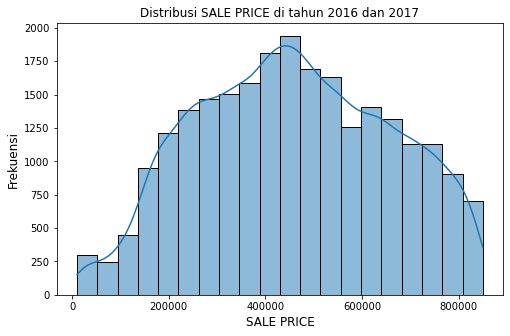

In [58]:
df_sale_price = df['SALE PRICE']

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(df_sale_price,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi SALE PRICE di tahun 2016 dan 2017', fontsize=12)
ax.set_xlabel('SALE PRICE', fontsize=12)
ax.set_ylabel('Frekuensi', fontsize=12)

**Melihat distribusi dari SALE PRICE (Pendekatan Distribusi Normal)**

Text(0, 0.5, 'Frekuensi')

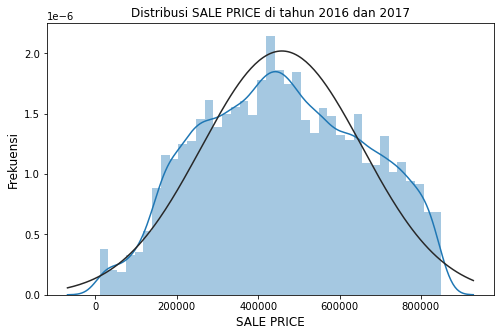

In [59]:
from scipy.stats import norm

fig = plt.figure(figsize=(8,5))
x = pd.Series(df['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.set_title('Distribusi SALE PRICE di tahun 2016 dan 2017', fontsize=12)
ax.set_xlabel('SALE PRICE', fontsize=12)
ax.set_ylabel('Frekuensi', fontsize=12)

Dapat dilihat dari grafik distribusi dengan pendekatan normal, bahwa distribusi data SALE PRICE di New York dari tahun 2016-2017 tidak berdistribusi normal. Selanjutnya akan dilakukan pengambilan sampel mean untuk membuat distribusi normal dari data SALE PRICE.

---
**Perhitungan Central Limit Theorem**

Mengambil sejumlah 1000 sample mean dari sejumlah 100 nilai acak.

In [60]:
n = 100
m = 1000
sample_mean_sale_price = []
for i in range(m):
    sample_values = np.random.choice(a=df_sale_price,size=n)
    sample_mean_sale_price.append(np.mean(sample_values))

Melihat distribusi dari sampel mean

Text(0, 0.5, 'Frekuensi')

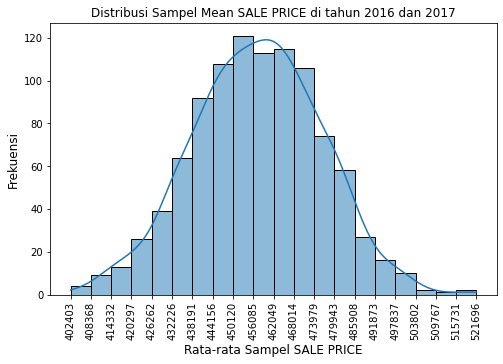

In [61]:
count, bin_edges = np.histogram(sample_mean_sale_price, bins=20)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_sale_price,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016 dan 2017', fontsize=12)
ax.set_xlabel('Rata-rata Sampel SALE PRICE', fontsize=12)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=12)

Melihat distribusi dari sampel mean (Pendekatan Distribusi Normal)

Text(0, 0.5, 'Frekuensi')

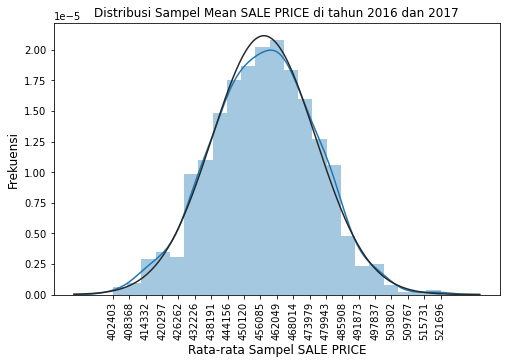

In [62]:
from scipy.stats import norm

fig = plt.figure(figsize=(8,5))
x = pd.Series(sample_mean_sale_price, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016 dan 2017', fontsize=12)
ax.set_xlabel('Rata-rata Sampel SALE PRICE', fontsize=12)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=12)

**Kesimpulan**: Data SALE PRICE tidak berdistribusi normal. Kemudian dilakukan proses pengambilan sampel acak menggunakan *Central Limit Theorem*, dengan melihat grafik distribusi sampel mean SALE PRICE secara visual, maka data sudah mengikuti distribusi normal.

# Confidence Intervals

**Question** : Menghitung nilai Confidence Intervals untuk mengestimasi rata-rata harga jual (SALE PRICE) properti di New York dari tahun 2016 - 2017.

Akan digunakan perhitungan Central Limit Theorem yang sebelumnya sudah dilakukan.

---
**Melihat kembali distribusi sampel mean SALE PRICE**

Text(0, 0.5, 'Frekuensi')

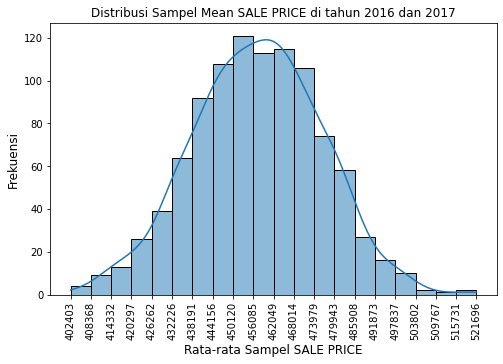

In [63]:
count, bin_edges = np.histogram(sample_mean_sale_price, bins=20)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_sale_price,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016 dan 2017', fontsize=12)
ax.set_xlabel('Rata-rata Sampel SALE PRICE', fontsize=12)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=12)

In [64]:
sample_means_series = pd.Series(sample_mean_sale_price)

# hitung nilai rata-rata
print('Rata rata sampel mean SALE PRICE = ', sample_means_series.mean())

# Hitung nilai median
print('Median sampel mean SALE PRICE = ', sample_means_series.median())

# hitung standard deviasi 
print('Standar Deviasi sampel mean SALE PRICE = ', sample_means_series.std())

Rata rata sampel mean SALE PRICE =  457349.90206000005
Median sampel mean SALE PRICE =  457646.96499999997
Standar Deviasi sampel mean SALE PRICE =  18875.88396961566


Dapat diketahui bahwa sampel mean untuk SALE PRICE hasil dari central limit theorem **berdistribusi normal**. Hal itu ditandai oleh grafik yang dihasilkan sudah menyerupai bell curve; serta nilai *mean* dan *median* yang hampir sama.

---
**Menghitung rata-rata populasi**

In [65]:
pop_mean_sale_price = df['SALE PRICE'].mean()
pop_mean_sale_price

458166.8390465097

**Menghitung standar deviasi populasi**

In [66]:
pop_std_sale_price = df['SALE PRICE'].std()
pop_std_sale_price

197565.37422653649

---
**Menghitung mean, standard deviasi dari sampel mean**

In [67]:
mean_of_sampel_mean = np.mean(sample_mean_sale_price)
print('Rata rata sampel mean SALE PRICE = ', mean_of_sampel_mean)

std_of_sampel_mean = np.std(sample_mean_sale_price)
print('Standar Deviasi sampel mean SALE PRICE = ', std_of_sampel_mean)

Rata rata sampel mean SALE PRICE =  457349.90206
Standar Deviasi sampel mean SALE PRICE =  18866.443666964882


---
**Menetapkan nilai z-score**

In [68]:
z_score = 1.96

---
**Menghitung standard error dari sampel mean**

In [69]:
number_of_observation = len(df)
standard_error_of_sampel_mean = pop_std_sale_price/np.sqrt(number_of_observation)

---
**Menghitung batas atas dan bawah CI (95%)**

In [70]:
lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean
lower_bound, upper_bound

(454852.3316675766, 459847.47245242336)

---
**Melihat Histogram dengan Confidence Intervals (CI)**

Text(0.5, 0, 'Sampel Mean New York Property Sales Price')

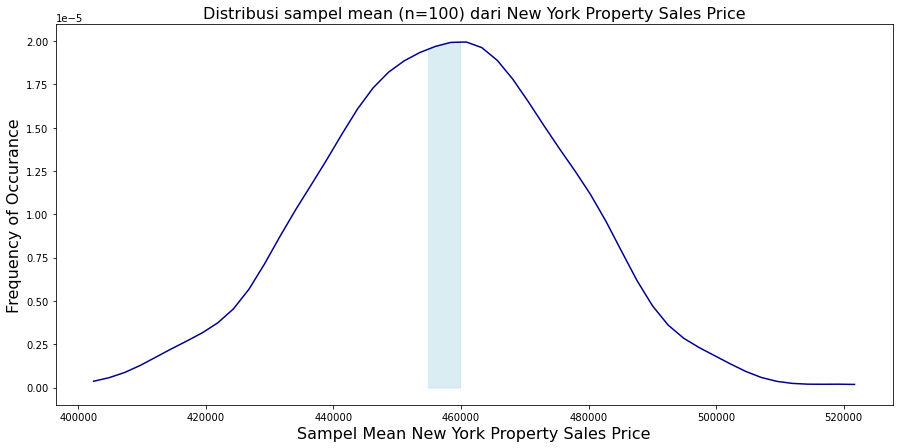

In [71]:
plt.figure(figsize=(15,7))
kde = scistats.gaussian_kde(sample_mean_sale_price)
pos = np.linspace(np.min(sample_mean_sale_price), np.max(sample_mean_sale_price))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound,upper_bound)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi sampel mean (n='+str(n)+') dari New York Property Sales Price', fontsize=16)
plt.ylabel('Frequency of Occurance', fontsize=16)
plt.xlabel('Sampel Mean New York Property Sales Price',fontsize=16)

**Kesimpulan** : Area di bawah kurva yang diarsir menunjukkan 95% data sampel mean berada pada area ini. Atau dengan kata lain berada dalam rentang +- 1.96 z score dari nilai rata-ratanya. <br>

95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual properti (SALE PRICE) di New York City dari tahun 2016 - 2017 berada dalam rentang **454852.3316675766** sampai **459847.47245242336** US Dollar

# Hypotesis Testing

**Question** : Apakah rata-rata harga jual bangunan (SALE PRICE) di New York City pada tahun 2017 berbeda secara signifikan dari rata-rata harga jual bangunan (SALE PRICE) pada tahun 2016? 

---
**Populasi**: Harga jual bangunan (SALE PRICE) dalam NYC Sales Dataset pada tahun 2016 dan 2017 <br>

**Parameter of Interest**: <br>
μ1 = harga jual properti (SALE PRICE) di New York City pada tahun 2016 <br>
μ2 = harga jual properti (SALE PRICE) di New York City pada tahun 2017 <br>

**Hipotesis** <br>
H0 : μ1 = μ2 (Rata-rata harga jual properti tahun 2016 dan 2017 adalah sama) <br> 
H1 : μ1  μ2 (Rata-rata harga jual properti tahun 2016 dan 2017 memiliki perbedaan yang signifikan)

Level signifikansi atau *alhpa* yang digunakan sebesar 0.05 <br>

1. Jika *p value* > *alpha*, maka keputusan menerima H0 
2. Jika *p value* <= *alpha*, maka keputusan menolak H0
---

---
**Melihat distribusi data apakah sudah normal atau belum**

- Mendefinisikan sales untuk masing-masing tahun

In [72]:
# (SALE PRICE) untuk tahun 2016
sales_2016 = df[(df['SALE YEAR']==2016)]['SALE PRICE']

# SALE PRICE) untuk tahun 2017
sales_2017 = df[(df['SALE YEAR']==2017)]['SALE PRICE']

# banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)

(8396, 15642)

- Menampilkan plot distribusi tahun 2016 dan 2017

Text(0, 0.5, 'Frekuensi')

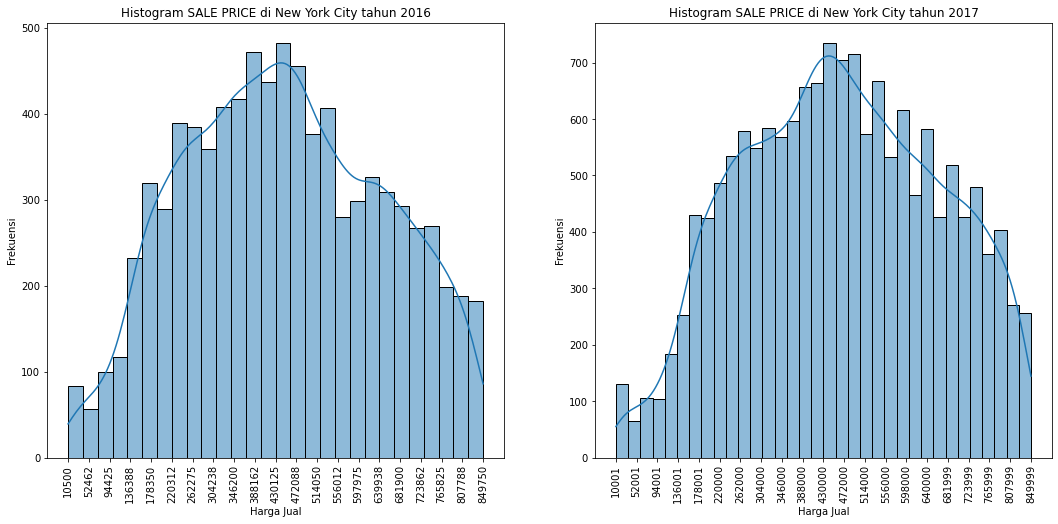

In [73]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# 2016
count, bin_edges_2016 = np.histogram(sales_2016,bins=20)
sns.histplot(sales_2016,kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE di New York City tahun 2016')
ax.set_xlabel('Harga Jual')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# 2017
count, bin_edges_2017 = np.histogram(sales_2017,bins=20)
sns.histplot(sales_2017, kde=True, ax=ax0)
ax0.set_title('Histogram SALE PRICE di New York City tahun 2017')
ax0.set_xlabel('Harga Jual')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

Dapat dilihat bahwa data belum berdistribusi normal, maka akan dilakukan penerapan sampling Central Limit Theorem agar bisa dilakukan analisis hipotesis lebih lanjut

---
**Perhitungan Central Limit Theorem (n=100)**

In [74]:
# Sample Means (2016)
sample_means_2016 = [] 
n = 100 
m = 1000

for sample in range(0,m):
    sample_values = np.random.choice(a=sales_2016, size=n)
    sample_mean = np.mean(sample_values)
    sample_means_2016.append(sample_mean)

# Sample Means (2017)
sample_means_2017 = [] 
n = 100 
m = 1000

for sample in range(0,m):
    sample_values = np.random.choice(a=sales_2017, size=n)
    sample_mean = np.mean(sample_values)
    sample_means_2017.append(sample_mean)

- Melihat distribusi sample mean 2016 dan 2017

Text(0, 0.5, 'Frekuensi')

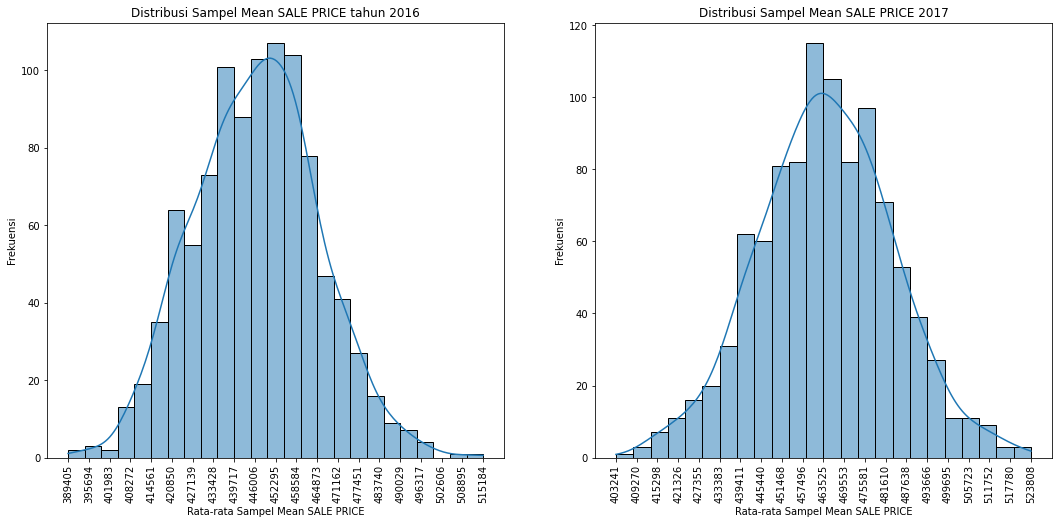

In [75]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# 2016
count, bin_edges_2016 = np.histogram(sample_means_2016,bins=20)
sns.histplot(sample_means_2016, kde=True, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE tahun 2016')
ax.set_xlabel('Rata-rata Sampel Mean SALE PRICE')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# 2017
count, bin_edges_2017 = np.histogram(sample_means_2017,bins=20)
sns.histplot(sample_means_2017, kde=True, ax=ax0)
ax0.set_title('Distribusi Sampel Mean SALE PRICE 2017')
ax0.set_xlabel('Rata-rata Sampel Mean SALE PRICE')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

Dapat dilihat bahwa data sample means SALE PRICE untuk 2016 dan 2017 sudah berdistribusi normal, sehingga analisis hipotesis bisa dilanjutkan

--- 
**Menghitung nilai Test Statistics**

In [76]:
z_score, pvalue = sm.stats.ztest(sample_means_2016, sample_means_2017,alternative='two-sided')
print('Nilai p-value:', pvalue)

Nilai p-value: 2.4421030279087966e-94


**Pengambilan Keputusan**

In [77]:
if pvalue > 0.05:
    print("H0 diterima, menolak H1")
else:
    print("H0 ditolak, menerima H1")

H0 ditolak, menerima H1


**Kesimpulan** : Berdasarkan alpha=0.05, dengan nilai p-value (2.259250382902968e-77) < alpha (0.05), maka H0 ditolak sehingga menerima H1 yakni Rata-rata harga jual properti di New York tahun 2016 dan 2017 memiliki perbedaan yang signifikan.

# Overall Analysis

Secara keseluruhan, dapat disimpulkan bahwa dataset NYC Property Sales tahun 2016-2017 ini merupakan dataset yang memiliki cukup banyak value yang buruk sehingga perlu dilakukan pre-processing sedimikian rupa. Kemudian untuk persebaran distribusi data dengan melihat dari SALE PRICE juga dapat disimpulkan memiliki persebaran data yang tidak normal.

Untuk melakukan analisis lebih lanjut seperti membuat distribusi menjadi normal maka bisa dilakukan penerapan sampling data dengan Central Limit Theorem. Dimana hasil dari sampling data tersebut dapat digunakan tidak hanya untuk membuat distribusi menjadi normal, tetapi berguna juga untuk analisis lebih lanjut seperti menghitung Confidence Intervals dan melakukan penelitian dengan adanya hipotesis.